In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [3]:
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


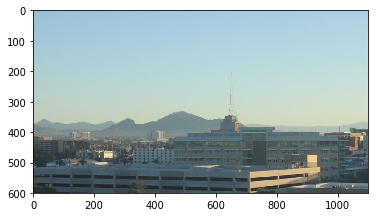

In [5]:
#Visualize the standardizes data
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


In [6]:
#Feature Extraction
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    sum_birghtness = np.sum(hsv[:, :, 2])
    area = 600*1100.0 #pixels
    
    avg = sum_birghtness / area
    return avg

Avg brightness: 72.27989242424242


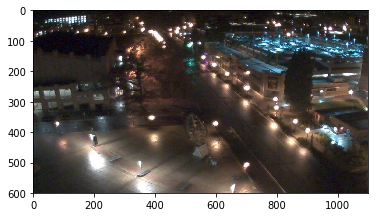

In [35]:
# testing the avg brightness
image_num = 169
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

# classiffying and Visualizing Error

In [38]:
def estimated_label(rgb_image):
    
    avg = avg_brightness(rgb_image)
    
    predicted_label = 0 #night
    threshold_value = 100
    if avg > threshold_value:
        predicted_label = 1
    return predicted_label
    

In [39]:
estimated_label(test_im)

0

In [40]:
#Testing the classifier
import random

#Load the dataset
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

#shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [41]:
# determining the accuracy
def get_misscalssified_images(test_images):
    misclassified_images_labels = []
    
    for image in test_images:
        im = image[0]
        true_label = image[1]
        
        #get predicted label from classifier
        predicted_label = estimated_label(im)
        if predicted_label != true_label:
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    return misclassified_images_labels
        

In [44]:
#Find all the misclassified images in a given test set
MISCLASSIFIED = get_misscalssified_images(STANDARDIZED_TEST_LIST)

#accuracy calculation
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct / total

print('Accuracy: ' + str(accuracy))
print('Number of misclassified images = ' + str(len(MISCLASSIFIED)) + 'out of ' + str(total))

Accuracy: 0.925
Number of misclassified images = 12out of 160


# Visualize the misclassified images


label: 1
Average:  111.84575


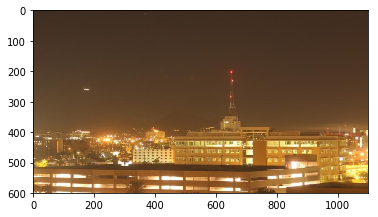

In [47]:
num = 0
test_mis_im = MISCLASSIFIED[num][0]
tes_mis_label = MISCLASSIFIED[num][1]
print('label: ' + str(tes_mis_label))
plt.imshow(test_mis_im)

wrongavg = avg_brightness(test_mis_im)
print("Average: ", wrongavg)